INTRODUCTION 


This dataset contains information about 205 cars, including their specifications, engine details, fuel efficiency, and prices. It includes 26 columns, such as car name, body type, engine size, horsepower, mileage, and price. The dataset can be used for analyzing car features and predicting car prices based on various attributes.

IMPORT LABARIES AND LOAD DATASET

In [13]:
#import the required libaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


#import dataset
df=pd.read_csv(r"C:\Data Science\data_set\CarPrice_Assignment.csv")
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

DATA CLEANING

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:

le=LabelEncoder()
df["fueltype"]=le.fit_transform(df["fueltype"])
df["carbody"]=le.fit_transform(df["carbody"])
df["enginetype"]=le.fit_transform(df["enginetype"])
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,std,two,2,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,std,four,3,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,std,four,3,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,std,two,3,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,std,four,3,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,std,four,4,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,turbo,four,3,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,turbo,two,2,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


EXTRACTING INDEPENDENT AND DEPENDENT VARIABLE

In [18]:

x=df[["fueltype","carbody","wheelbase","enginetype","enginesize","horsepower","peakrpm","citympg","highwaympg"]]
x=pd.DataFrame(x)
y=df["price"]
y=pd.DataFrame(y)


DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS

            fueltype   carbody  wheelbase  enginetype  enginesize  horsepower  \
fueltype    1.000000 -0.147853  -0.308346    0.082695   -0.069594    0.163926   
carbody    -0.147853  1.000000   0.401362   -0.037024   -0.073352   -0.153928   
wheelbase  -0.308346  0.401362   1.000000   -0.135577    0.569329    0.353294   
enginetype  0.082695 -0.037024  -0.135577    1.000000    0.040766    0.010301   
enginesize -0.069594 -0.073352   0.569329    0.040766    1.000000    0.809769   
horsepower  0.163926 -0.153928   0.353294    0.010301    0.809769    1.000000   
peakrpm     0.476883 -0.109643  -0.360469    0.005599   -0.244660    0.131073   
citympg    -0.255963  0.031697  -0.470414   -0.085004   -0.653658   -0.801456   
highwaympg -0.191392 -0.007170  -0.544082   -0.078456   -0.677470   -0.770544   
price      -0.105679 -0.083976   0.577816    0.049171    0.874145    0.808139   

             peakrpm   citympg  highwaympg     price  
fueltype    0.476883 -0.255963   -0.191392 -0.105679 

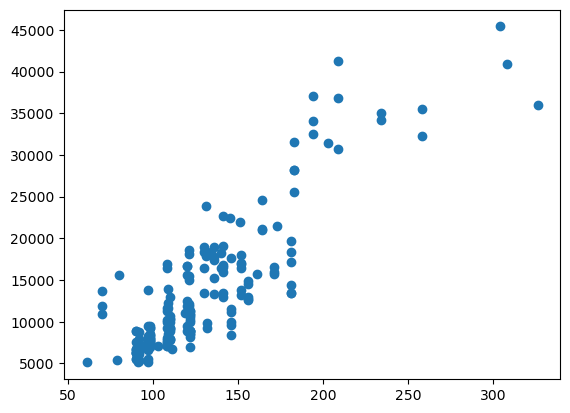

In [19]:
cor=df[["fueltype","carbody","wheelbase","enginetype","enginesize","horsepower","peakrpm","citympg","highwaympg","price"]].corr()
print(cor)
#sns.heatmap(cor)
plt.scatter(df['enginesize'],df['price'])
plt.show()

SPLITING DATA INTO TRAIN AND TEST DATA


In [20]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

MODEL BUILDING AND EVALAUTE PREDICTIONS

LINEAR REGRESSION

In [21]:
#create linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
#make prediction
y_pred=model.predict(x_test)

In [23]:
#calculate evaluation metrics
print('mean absloute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


mean absloute error: 2780.7112450678455
mean squared error: 13933066.42411039
root mean squared error: 3732.7022951355752


In [24]:
#check the accuracy of the model
accuracy=r2_score(y_test,y_pred)
print("accuracy is",accuracy*100,"%")

accuracy is 82.0024259160813 %


SUMMARY

This project aimed to predict car price accuracy by using their specification given in the data set.while performing the multi linear regression model achieved accuracy of the price of car is 82.0%
